In [9]:
from pathlib import Path

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as T
from torchvision.utils import make_grid
import torch
from itertools import product
import seaborn as sns

from experiments.dataset import Focus

In [10]:
bg_var_root = Path("/cmlscratch/pkattaki/datasets/focus")
bucket_url = "http://bg-var-bucket.s3.amazonaws.com/"
categories = [
    "truck",
    "car",
    "plane",
    "ship",
    "cat",
    "dog",
    "horse",
    "deer",
    "frog",
    "bird",
]
times = [
        "day",
        "night",
        "none",
]

weathers = [
    "cloudy",
        "foggy",
        "partly cloudy",
        "raining",
        "snowing",
        "sunny",
        "none",
]

locations = [
    "forest",
    "grass",
    "indoors",
        "rocks",
        "sand",
        "street",
        "snow",
        "water",
        "none",
]

uncommon = {
    0: {  # truck
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {2, 3, 6, 7},
    },
    1: {  # car
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {2, 3, 6, 7},
    },
    2: {  # plane
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {0, 2, 3, 4, 6, 7},
    },
    3: {  # ship
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {0, 1, 2, 3, 4, 5, 6},
    },
    4: {  # cat
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {0, 3, 4, 6, 7},
    },
    5: {  # dog
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {0, 3, 6},
    },
    6: {  # horse
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {2, 3, 5, 6, 7},
    },
    7: {  # deer
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {2, 3, 4, 5, 6, 7},
    },
    8: {  # frog
        "time": {},
        "weather": {1, 3, 4},
        "locations": {2, 5, 6},
    },
    9: {  # bird
        "time": {1},
        "weather": {1, 3, 4},
        "locations": {2, 3, 5, 6},
    },
}

In [11]:
def is_time_uncommon(category_label, time_label):
    uncommon_settings = uncommon[category_label]
    return time_label in uncommon_settings["time"]

def is_weather_uncommon(category_label, weather_label):
    uncommon_settings = uncommon[category_label]
    return weather_label in uncommon_settings["weather"]


def is_locations_uncommon(category_label, locations_label):
    uncommon_settings = uncommon[category_label]
    return not set(locations_label.tolist()).isdisjoint(uncommon_settings["locations"])


def count_uncommon_attributes(
    category_label, time_label, weather_label, locations_label
):
    return sum(
        [
            is_time_uncommon(category_label, time_label),
            is_weather_uncommon(category_label, weather_label),
            is_locations_uncommon(category_label, locations_label),
        ]
    )

In [12]:
dataset = Focus(
    bg_var_root,
    categories=[
        "truck",
#         "car",
#         "plane",
#         "ship",
#         "cat",
#         "horse",
#         "horse",
#         "deer",
#         "frog",
#         "bird",
    ],
    times=None,
    weathers=["snowing"],
    locations=None,
    transform=None
)

In [29]:
predictions = np.load("/cmlscratch/pkattaki/void/bg-var/logs/resnet/predictions.npy")
for idx in range(predictions.shape[0]):
#     if predictions[idx, 12] == 1:
        print(idx, bucket_url + dataset.image_files[idx][0][1:])    

0 http://bg-var-bucket.s3.amazonaws.com/truck-snow/149.jpg
1 http://bg-var-bucket.s3.amazonaws.com/car-snow/125.jpg
2 http://bg-var-bucket.s3.amazonaws.com/truck-snow/38.jpg
3 http://bg-var-bucket.s3.amazonaws.com/truck-snow/239.jpg
4 http://bg-var-bucket.s3.amazonaws.com/car-snow/87.jpg
5 http://bg-var-bucket.s3.amazonaws.com/truck-snow/127.jpg
6 http://bg-var-bucket.s3.amazonaws.com/truck-snow/159.jpg
7 http://bg-var-bucket.s3.amazonaws.com/truck-snow/221.jpg
8 http://bg-var-bucket.s3.amazonaws.com/truck-snow/35.jpg
9 http://bg-var-bucket.s3.amazonaws.com/truck-snow/280.jpg
10 http://bg-var-bucket.s3.amazonaws.com/truck-snow/13.jpg
11 http://bg-var-bucket.s3.amazonaws.com/truck-rain/139.jpg
12 http://bg-var-bucket.s3.amazonaws.com/car-snow/61.jpg


IndexError: list index out of range

In [8]:
idx = 33
print(dataset.image_files[idx][0][1:])

horse-fog/56.jpg


1036 & 2232 & 1498 & 1573 & 1809 & 2415 & 1989 & 1622 & 931 & 2298 & 
50 & 241 & 128 & 159 & 72 & 56 & 60 & 51 & 180 & 45 & 
29 & 212 & 109 & 29 & 941 & 503 & 66 & 34 & 323 & 124 & 


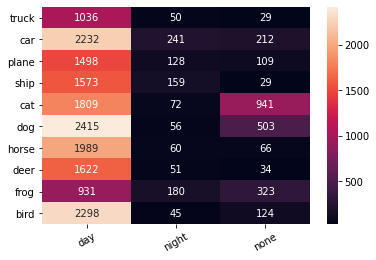

In [13]:
freq_time = np.zeros((len(categories), len(times)), dtype=np.int64)
for (cat_idx, category), (time_idx, time) in product(enumerate(categories), enumerate(times)):
    dataset = Focus(
        bg_var_root,
        categories=[category],
        times=[time],
        weathers=None,
        locations=None,
        transform=None
    )
    freq_time[cat_idx, time_idx] = len(dataset)
heatmap = sns.heatmap(freq_time,
            annot=True,
            xticklabels=times,
            yticklabels=categories,
            fmt='d'
)
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=30)
for j in range(freq_time.shape[1]):
    for i in range(freq_time.shape[0]):
        print(f"{freq_time[i, j]} &", end=" ")
    print("")

139 & 301 & 259 & 324 & 50 & 151 & 186 & 95 & 17 & 171 & 
27 & 103 & 56 & 109 & 7 & 46 & 105 & 78 & 1 & 43 & 
145 & 310 & 305 & 309 & 111 & 170 & 284 & 175 & 44 & 151 & 
10 & 92 & 19 & 7 & 11 & 7 & 14 & 2 & 3 & 17 & 
9 & 39 & 4 & 3 & 23 & 39 & 36 & 44 & 0 & 32 & 
538 & 956 & 694 & 687 & 639 & 1083 & 957 & 742 & 423 & 1184 & 
247 & 884 & 398 & 322 & 1981 & 1478 & 533 & 571 & 946 & 869 & 


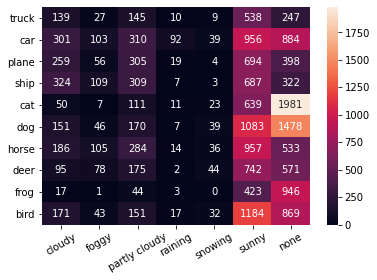

In [14]:
freq_weather = np.zeros((len(categories), len(weathers)), dtype=np.int64)
for (cat_idx, category), (weather_idx, weather) in product(enumerate(categories), enumerate(weathers)):
    dataset = Focus(
        bg_var_root,
        categories=[category],
        times=None,
        weathers=[weather],
        locations=None,
        transform=None
    )
    freq_weather[cat_idx, weather_idx] = len(dataset)
heatmap = sns.heatmap(freq_weather,
            annot=True,
            xticklabels=weathers,
            yticklabels=categories,
            fmt='d'
)
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=30)
for j in range(freq_weather.shape[1]):
    for i in range(freq_weather.shape[0]):
        print(f"{freq_weather[i, j]} &", end=" ")
    print("")

172 & 378 & 178 & 79 & 123 & 247 & 586 & 916 & 142 & 400 & 
326 & 651 & 391 & 105 & 517 & 804 & 1142 & 1255 & 274 & 541 & 
31 & 259 & 125 & 5 & 1344 & 790 & 93 & 10 & 39 & 40 & 
43 & 115 & 55 & 71 & 137 & 109 & 92 & 95 & 239 & 183 & 
295 & 526 & 239 & 187 & 143 & 414 & 662 & 214 & 152 & 296 & 
708 & 1635 & 389 & 103 & 405 & 372 & 417 & 103 & 29 & 130 & 
88 & 255 & 110 & 140 & 127 & 298 & 206 & 290 & 7 & 176 & 
46 & 211 & 296 & 1606 & 93 & 403 & 296 & 122 & 355 & 581 & 
56 & 96 & 526 & 51 & 372 & 279 & 146 & 49 & 446 & 699 & 


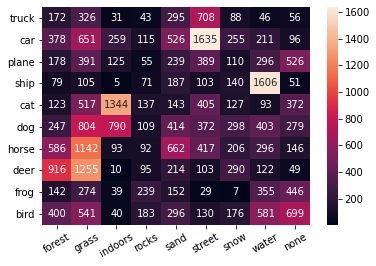

In [15]:
freq_location = np.zeros((len(categories), len(locations)), dtype=np.int64)
for (cat_idx, category), (location_idx, location) in product(enumerate(categories), enumerate(locations)):
    dataset = Focus(
        bg_var_root,
        categories=[category],
        times=None,
        weathers=None,
        locations=[location],
        transform=None
    )
    freq_location[cat_idx, location_idx] = len(dataset)
heatmap = sns.heatmap(freq_location,
            annot=True,
            xticklabels=locations,
            yticklabels=categories,
            fmt='d'
)
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=30)
for j in range(freq_location.shape[1]):
    for i in range(freq_location.shape[0]):
        print(f"{freq_location[i, j]} &", end=" ")
    print("")

In [16]:
predictions = np.load("/cmlscratch/pkattaki/void/bg-var/logs/resnet/predictions.npy")
predictions.shape

(20815, 15)

In [17]:
partition_sizes = {
    0: 0,
    1: 0,
    2: 0,
    3: 0
}
for idx in range(predictions.shape[0] - 2):
    partition_sizes[np.sum(predictions[idx, 10:13])] += 1
print(partition_sizes)

{0: 14144, 1: 5974, 2: 674, 3: 21}


In [18]:
# accuracy for different
predictions = np.load("/cmlscratch/pkattaki/void/bg-var/logs/resnet/predictions.npy")
np.set_printoptions(precision=2)
partition_accuracies = np.zeros((2, len(categories), 8))
for idx in range(predictions.shape[0] - 2):
    category = np.where(predictions[idx, 0:10])[0]
    if predictions[idx, 10] == 0 and predictions[idx, 11] == 0 and predictions[idx, 12] == 0:
        uncommon = 0
    elif predictions[idx, 10] == 1 and predictions[idx, 11] == 0 and predictions[idx, 12] == 0:
        uncommon = 1
    elif predictions[idx, 10] == 0 and predictions[idx, 11] == 1 and predictions[idx, 12] == 0:
        uncommon = 2
    elif predictions[idx, 10] == 0 and predictions[idx, 11] == 0 and predictions[idx, 12] == 1:
        uncommon = 3
    elif predictions[idx, 10] == 1 and predictions[idx, 11] == 1 and predictions[idx, 12] == 0:
        uncommon = 4
    elif predictions[idx, 10] == 0 and predictions[idx, 11] == 1 and predictions[idx, 12] == 1:
        uncommon = 5
    elif predictions[idx, 10] == 1 and predictions[idx, 11] == 0 and predictions[idx, 12] == 1:
        uncommon = 6
    elif predictions[idx, 10] == 1 and predictions[idx, 11] == 1 and predictions[idx, 12] == 1:
        uncommon = 7
    partition_accuracies[1, category, uncommon] += 1
    partition_accuracies[0, category, uncommon] += predictions[idx, 13]
print(np.sum(partition_accuracies[1], axis=0))
# print(partition_accuracies[0] / partition_accuracies[1])

[14144.   641.   448.  4885.    43.   474.   157.    21.]


In [27]:
predictions = np.load("/cmlscratch/pkattaki/void/bg-var/logs/resnet/predictions.npy")
print(predictions[-3:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
